In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
class RetailAnalyzer:
    def __init__(self):
        self.data = None

    def load_data(self):
        file_path = input(" Enter the CSV file path or name: ").strip('"')
        try:
            self.data = pd.read_csv(file_path)
            print(self.data," Dataset loaded successfully!")
        except FileNotFoundError:
            print("File not found! Please check the path and try again.")

    def calculate_matrics(self):
        total_sales = self.data["total sales"].sum()
        print("Total sales is:",total_sales)

        average_sale = self.data["total sales"].mean()
        print("Average sales is:", average_sale)

        product_sales = self.data.groupby("product")["quantity sold"].sum()
        most_popular_product = product_sales.idxmax()
        most_popular_quantity = product_sales.max()
        print(f"Most Popular Product: {most_popular_product} (Total Sold: {most_popular_quantity})")
        
    def filter_data(self, product=None, category=None, price_range=None, sale_range=None):
        filtered_df = self.data.copy()
        if product:
            filtered_df = filtered_df[filtered_df["product"].str.lower() == product.lower()]
        if category:
            filtered_df = filtered_df[filtered_df["category"].str.lower() == category.lower()]
        if price_range:
            filtered_df = filtered_df[
                (filtered_df["price"] >= price_range[0]) &
                (filtered_df["price"] <= price_range[1])
            ]
        if sale_range:
            filtered_df = filtered_df[
                (filtered_df["total sale"] >= sale_range[0]) &
                (filtered_df["total sale"] <= sale_range[1])
            ]

        return filtered_df
        
    def display_summary(self):
        if self.data is None:
            print("No data loaded. Please load the dataset first.")
            return

        print("\n===== SALES SUMMARY REPORT =====")
        print(f"Total Records: {len(self.data)}")

        total_sales = self.data["total sales"].sum()
        avg_sales = self.data["total sales"].mean()

        product_sales = self.data.groupby("product")["quantity sold"].sum()
        most_popular_product = product_sales.idxmax()
        most_popular_quantity = product_sales.max()

        print(f"Total Sales: {total_sales:,.2f}")
        print(f"Average Sale per Transaction: {avg_sales:,.2f}")
        print(f"Most Popular Product: {most_popular_product} (Sold: {most_popular_quantity})")

        category_sales = self.data.groupby("category")["total sales"].sum().sort_values(ascending=False)
        print("\nSales by Category:")
        print(category_sales.to_string())
        
    def clean_data(self):
        """
        Normalize column names, parse dates, handle missing values,
        cast numerics, create total_sale if missing, drop duplicates.
        """
        if self.data is None:
            print("No data to clean. Load a dataset first.")
            return

        # Normalize columns: strip, lower, replace spaces with underscore
        self.data.columns = [c.strip().lower().replace(" ", "_") for c in self.data.columns]

        # Map common variants to canonical names
        col_map = {
            "total_sale": "total_sale", "total_sale_": "total_sale",
            "total_sales": "total_sale", "total sale": "total_sale",
            "quantity_sold": "quantity_sold", "quantity": "quantity_sold", "qty": "quantity_sold",
            "price": "price", "product": "product", "product_name": "product",
            "category": "category", "date(yyyy-mm-dd)": "date", "date": "date"
        }
        # Only rename if source present and destination not already present
        for src, dest in col_map.items():
            if src in self.data.columns and dest not in self.data.columns:
                self.data = self.data.rename(columns={src: dest})

        # Parse date if present
        if "date" in self.data.columns:
            self.data["date"] = pd.to_datetime(self.data["date"], errors="coerce")

        # Trim whitespace on object columns
        for c in self.data.select_dtypes(include=["object"]).columns:
            self.data[c] = self.data[c].astype(str).str.strip()

        # Convert numeric columns safely
        if "price" in self.data.columns:
            self.data["price"] = pd.to_numeric(self.data["price"], errors="coerce")
        if "quantity_sold" in self.data.columns:
            self.data["quantity_sold"] = pd.to_numeric(self.data["quantity_sold"], errors="coerce")

        # Create total_sale if missing
        if "total_sale" not in self.data.columns:
            if "price" in self.data.columns and "quantity_sold" in self.data.columns:
                self.data["total_sale"] = (self.data["price"].fillna(0) * self.data["quantity_sold"].fillna(0)).round(2)
            else:
                # safe fallback
                self.data["total_sale"] = 0.0

        # Fill missing numeric values intelligently
        if "price" in self.data.columns and "product" in self.data.columns:
            # fill price by product median, then global median
            self.data["price"] = self.data.groupby("product")["price"].apply(lambda x: x.fillna(x.median()))
            self.data["price"] = self.data["price"].fillna(self.data["price"].median())

        if "quantity_sold" in self.data.columns:
            # fill missing quantity with 0 (or median if you prefer)
            self.data["quantity_sold"] = self.data["quantity_sold"].fillna(0).astype(int)

        # Ensure total_sale numeric and fill remaining NaNs
        self.data["total_sale"] = pd.to_numeric(self.data["total_sale"], errors="coerce")
        missing_total_mask = self.data["total_sale"].isna()
        if missing_total_mask.any():
            self.data.loc[missing_total_mask, "total_sale"] = (
                (self.data.loc[missing_total_mask, "price"].fillna(0) *
                 self.data.loc[missing_total_mask, "quantity_sold"].fillna(0))
            )


   




Analyzer = RetailAnalyzer()
Analyzer.load_data()
Analyzer.calculate_matrics()
Analyzer.filter_data()
Analyzer.display_summary()
Analyzer.clean_data()

 Enter the CSV file path or name:  sales_data.csv


    date(yyyy-mm-dd)     product         category  price  quantity sold  \
0           3/5/2025  Headphones        Computers  50969              1   
1           2/8/2025     Monitor        Computers  46594             16   
2          3/31/2025      Laptop      Accessories  53765              3   
3          4/30/2025    Keyboard      Electronics  42111              4   
4          3/29/2025  Smartphone      Electronics  25883             19   
..               ...         ...              ...    ...            ...   
495        2/21/2025    Keyboard      Accessories  20742              8   
496        6/10/2025     Printer  Office Supplies  99204              1   
497        5/22/2025      Router  Office Supplies    638              3   
498         9/5/2025       Mouse  Office Supplies  16552              7   
499        8/14/2025      Webcam        Computers  59306              8   

     total sales  
0          50969  
1         745504  
2         161295  
3         168444  
4   

TypeError: incompatible index of inserted column with frame index

 Enter the CSV file path or name:  sales_data.csv


    date(yyyy-mm-dd)     product         category  price  quantity sold  \
0           3/5/2025  Headphones        Computers  50969              1   
1           2/8/2025     Monitor        Computers  46594             16   
2          3/31/2025      Laptop      Accessories  53765              3   
3          4/30/2025    Keyboard      Electronics  42111              4   
4          3/29/2025  Smartphone      Electronics  25883             19   
..               ...         ...              ...    ...            ...   
495        2/21/2025    Keyboard      Accessories  20742              8   
496        6/10/2025     Printer  Office Supplies  99204              1   
497        5/22/2025      Router  Office Supplies    638              3   
498         9/5/2025       Mouse  Office Supplies  16552              7   
499        8/14/2025      Webcam        Computers  59306              8   

     total sales  
0          50969  
1         745504  
2         161295  
3         168444  
4   

C:\Users\Ibhrahim ansari\AppData\Local\Temp\ipykernel_21340\1977493459.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


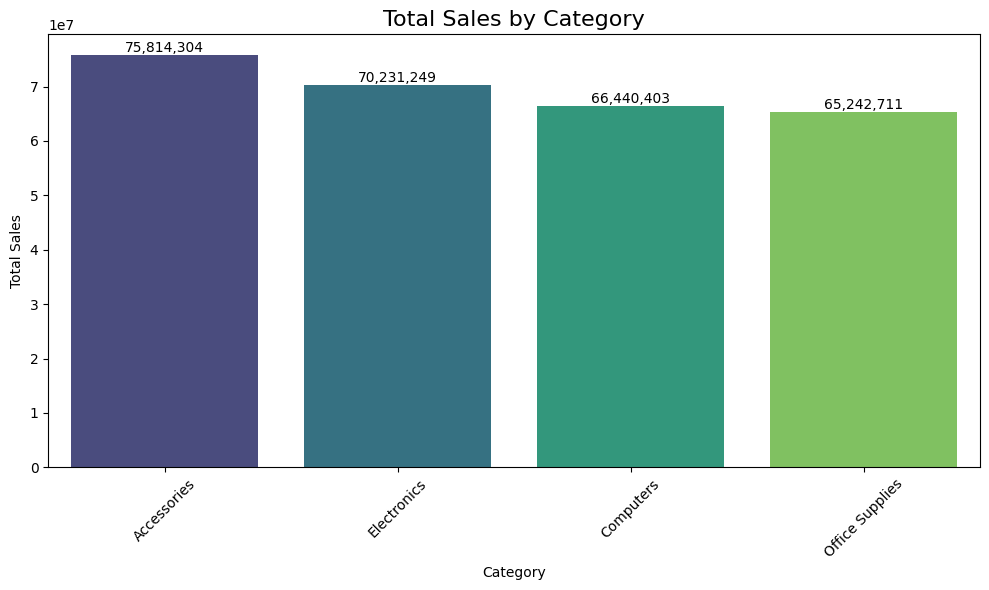

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class RetailAnalyzer:
    def __init__(self):
        self.data = None

    def load_data(self):
        file_path = input(" Enter the CSV file path or name: ").strip('"')
        try:
            self.data = pd.read_csv(file_path)
            print(self.data," Dataset loaded successfully!")
        except FileNotFoundError:
            print("File not found! Please check the path and try again.")

    def calculate_matrics(self):
        total_sales = self.data["total sales"].sum()
        print("Total sales is:",total_sales)

        average_sale = self.data["total sales"].mean()
        print("Average sales is:", average_sale)

        product_sales = self.data.groupby("product")["quantity sold"].sum()
        most_popular_product = product_sales.idxmax()
        most_popular_quantity = product_sales.max()
        print(f"Most Popular Product: {most_popular_product} (Total Sold: {most_popular_quantity})")
        
    def filter_data(self, product=None, category=None, price_range=None, sale_range=None):
        filtered_df = self.data.copy()
        if product:
            filtered_df = filtered_df[filtered_df["product"].str.lower() == product.lower()]
        if category:
            filtered_df = filtered_df[filtered_df["category"].str.lower() == category.lower()]
        if price_range:
            filtered_df = filtered_df[
                (filtered_df["price"] >= price_range[0]) &
                (filtered_df["price"] <= price_range[1])
            ]
        if sale_range:
            filtered_df = filtered_df[
                (filtered_df["total sale"] >= sale_range[0]) &
                (filtered_df["total sale"] <= sale_range[1])
            ]

        return filtered_df
        
    def display_summary(self):
        if self.data is None:
            print("No data loaded. Please load the dataset first.")
            return

        print("\n===== SALES SUMMARY REPORT =====")
        print(f"Total Records: {len(self.data)}")

        total_sales = self.data["total sales"].sum()
        avg_sales = self.data["total sales"].mean()

        product_sales = self.data.groupby("product")["quantity sold"].sum()
        most_popular_product = product_sales.idxmax()
        most_popular_quantity = product_sales.max()

        print(f"Total Sales: {total_sales:,.2f}")
        print(f"Average Sale per Transaction: {avg_sales:,.2f}")
        print(f"Most Popular Product: {most_popular_product} (Sold: {most_popular_quantity})")

        category_sales = self.data.groupby("category")["total sales"].sum().sort_values(ascending=False)
        print("\nSales by Category:")
        print(category_sales.to_string())
        
    def clean_data(self):
        """
        Normalize column names, parse dates, handle missing values,
        cast numerics, create total_sale if missing, drop duplicates.
        """
        if self.data is None:
            print("No data to clean. Load a dataset first.")
            return

        # Normalize columns: strip, lower, replace spaces with underscore
        self.data.columns = [c.strip().lower().replace(" ", "_") for c in self.data.columns]

        # Map common variants to canonical names
        col_map = {
            "total_sale": "total_sale", "total_sale_": "total_sale",
            "total_sales": "total_sale", "total sale": "total_sale",
            "quantity_sold": "quantity_sold", "quantity": "quantity_sold", "qty": "quantity_sold",
            "price": "price", "product": "product", "product_name": "product",
            "category": "category", "date(yyyy-mm-dd)": "date", "date": "date"
        }
        # Only rename if source present and destination not already present
        for src, dest in col_map.items():
            if src in self.data.columns and dest not in self.data.columns:
                self.data = self.data.rename(columns={src: dest})

        # Parse date if present
        if "date" in self.data.columns:
            self.data["date"] = pd.to_datetime(self.data["date"], errors="coerce")

        # Trim whitespace on object columns
        for c in self.data.select_dtypes(include=["object"]).columns:
            self.data[c] = self.data[c].astype(str).str.strip()

        # Convert numeric columns safely
        if "price" in self.data.columns:
            # FIXED: use transform instead of apply to avoid TypeError
            self.data["price"] = self.data.groupby("product")["price"].transform(lambda x: x.fillna(x.median()))
            self.data["price"] = self.data["price"].fillna(self.data["price"].median())

        if "quantity_sold" in self.data.columns:
            # fill missing quantity with 0
            self.data["quantity_sold"] = self.data["quantity_sold"].fillna(0).astype(int)

        # Create total_sale if missing
        if "total_sale" not in self.data.columns:
            if "price" in self.data.columns and "quantity_sold" in self.data.columns:
                self.data["total_sale"] = (self.data["price"].fillna(0) * self.data["quantity_sold"].fillna(0)).round(2)
            else:
                self.data["total_sale"] = 0.0

        # Ensure total_sale numeric and fill remaining NaNs
        self.data["total_sale"] = pd.to_numeric(self.data["total_sale"], errors="coerce")
        missing_total_mask = self.data["total_sale"].isna()
        if missing_total_mask.any():
            self.data.loc[missing_total_mask, "total_sale"] = (
                (self.data.loc[missing_total_mask, "price"].fillna(0) *
                 self.data.loc[missing_total_mask, "quantity_sold"].fillna(0))
            )
    def plot_total_sales_by_category(self):
        if self.data is None:
            print("No data loaded.")
            return

        category_sales = self.data.groupby("category")["total_sale"].sum().sort_values(ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
        plt.title("Total Sales by Category", fontsize=16)
        plt.xlabel("Category")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        for i, value in enumerate(category_sales.values):
            plt.text(i, value, f"{value:,.0f}", ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

    # 2️⃣ Line chart: sales trend over time
    def plot_sales_trend_over_time(self):
        if self.data is None or "date" not in self.data.columns:
            print("No data loaded or 'date' column missing.")
            return

        df_time = self.data.groupby("date")["total_sale"].sum().reset_index()
        plt.figure(figsize=(12,6))
        sns.lineplot(data=df_time, x="date", y="total_sale", marker="o")
        plt.title("Sales Trend Over Time", fontsize=16)
        plt.xlabel("Date")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # 3️⃣ Heatmap: correlation between price, quantity, total sales
    def plot_correlation_heatmap(self):
        if self.data is None:
            print("No data loaded.")
            return

        numeric_cols = ["price", "quantity_sold", "total_sale"]
        corr = self.data[numeric_cols].corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap", fontsize=16)
        plt.tight_layout()
        plt.show()



# ================= USAGE =================
Analyzer = RetailAnalyzer()
Analyzer.load_data()
Analyzer.calculate_matrics()
Analyzer.filter_data()
Analyzer.display_summary()
Analyzer.clean_data()
Analyzer.plot_total_sales_by_category()